# the cancer data 

## importing package 

In [2]:
import numpy as np   
import pandas as pd   
import matplotlib.pyplot as plt    
import statsmodels.api as sm  
import seaborn as sns 

## importing data 

In [3]:
data = pd.read_csv("E:/machine_learning_project/machine_learning_cour/cancer_issue.csv")
dt= pd.DataFrame(data)
dt.head(5)

,PatientID,Age,Gender,Race/Ethnicity,BMI,SmokingStatus,FamilyHistory,CancerType,Stage,TumorSize,TreatmentType,TreatmentResponse,SurvivalMonths,Recurrence,GeneticMarker,HospitalRegion
0,1,80,Female,Other,23.3,Smoker,Yes,Breast,II,1.7,Combination Therapy,No Response,103,Yes,NaN,South
1,2,76,Male,Caucasian,22.4,Former Smoker,Yes,Colon,IV,4.7,Surgery,No Response,14,Yes,BRCA1,West
2,3,69,Male,Asian,21.5,Smoker,Yes,Breast,III,8.3,Combination Therapy,Complete Remission,61,Yes,BRCA1,West
3,4,77,Male,Asian,30.4,Former Smoker,Yes,Prostate,II,1.7,Radiation,Partial Remission,64,No,KRAS,South
4,5,89,Male,Caucasian,20.9,Smoker,Yes,Lung,IV,7.4,Radiation,No Response,82,Yes,KRAS,South


## summarize information 

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          17686 non-null  int64  
 1   Age                17686 non-null  int64  
 2   Gender             17686 non-null  object 
 3   Race/Ethnicity     17686 non-null  object 
 4   BMI                17686 non-null  float64
 5   SmokingStatus      17686 non-null  object 
 6   FamilyHistory      17686 non-null  object 
 7   CancerType         17686 non-null  object 
 8   Stage              17686 non-null  object 
 9   TumorSize          17686 non-null  float64
 10  TreatmentType      17686 non-null  object 
 11  TreatmentResponse  17686 non-null  object 
 12  SurvivalMonths     17686 non-null  int64  
 13  Recurrence         17686 non-null  object 
 14  GeneticMarker      13360 non-null  object 
 15  HospitalRegion     17686 non-null  object 
dtypes: float64(2), int64(3

In [5]:
dt.dtypes

PatientID              int64
Age                    int64
Gender                object
Race/Ethnicity        object
BMI                  float64
SmokingStatus         object
FamilyHistory         object
CancerType            object
Stage                 object
TumorSize            float64
TreatmentType         object
TreatmentResponse     object
SurvivalMonths         int64
Recurrence            object
GeneticMarker         object
HospitalRegion        object
dtype: object

In [7]:
dt.isna().sum()

PatientID               0
Age                     0
Gender                  0
Race/Ethnicity          0
BMI                     0
SmokingStatus           0
FamilyHistory           0
CancerType              0
Stage                   0
TumorSize               0
TreatmentType           0
TreatmentResponse       0
SurvivalMonths          0
Recurrence              0
GeneticMarker        4326
HospitalRegion          0
dtype: int64

In [8]:
dt.describe()

,PatientID,Age,BMI,TumorSize,SurvivalMonths
count,17686.000000,17686.000000,17686.000000,17686.000000,17686.000000
mean,8843.500000,53.758396,29.253805,5.499751,60.387821
std,5105.652766,21.079473,6.203575,2.603107,34.794859
min,1.000000,18.000000,18.500000,1.000000,1.000000
25%,4422.250000,35.000000,23.900000,3.300000,30.000000
50%,8843.500000,54.000000,29.200000,5.500000,60.000000
75%,13264.750000,72.000000,34.600000,7.700000,91.000000
max,17686.000000,90.000000,40.000000,10.000000,120.000000


## analyse  univarie

In [9]:
dt.columns

Index(['PatientID', 'Age', 'Gender', 'Race/Ethnicity', 'BMI', 'SmokingStatus',
       'FamilyHistory', 'CancerType', 'Stage', 'TumorSize', 'TreatmentType',
       'TreatmentResponse', 'SurvivalMonths', 'Recurrence', 'GeneticMarker',
       'HospitalRegion'],
      dtype='object')

### analyse quantitative 

#### Age

##### global information 

In [16]:
dt["Age"].describe()

count    17686.000000
mean        53.758396
std         21.079473
min         18.000000
25%         35.000000
50%         54.000000
75%         72.000000
max         90.000000
Name: Age, dtype: float64

In [15]:
dt["Age"].value_counts().sort_index()

Age
18    272
19    245
20    244
21    228
22    213
     ... 
86    229
87    243
88    255
89    244
90    240
Name: count, Length: 73, dtype: int64

##### missing values and outliers 

missing values

In [18]:
dt["Age"].isna().sum()

0

outliers 

In [20]:

Q1 = dt["Age"].quantile(0.25)
Q3 = dt["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = dt[(dt["Age"] < lower_bound) | (dt["Age"] > upper_bound)]

outliers["Age"]


Series([], Name: Age, dtype: int64)

##### representation graphic 

boxplot

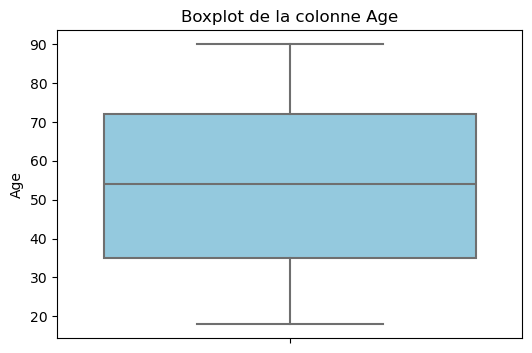

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=dt["Age"], color="skyblue")
plt.title("Boxplot de la colonne Age")
plt.show()

histogramme 

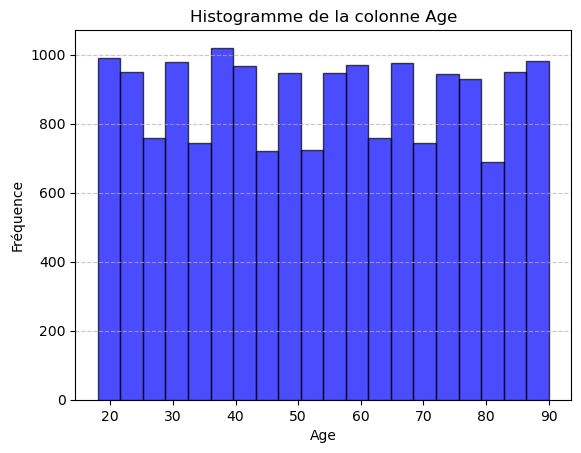

In [24]:

plt.hist(dt["Age"], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Fréquence")
plt.title("Histogramme de la colonne Age")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [25]:

def categorize_age(age):
    if age <= 40:
        return "[30-40]"
    elif age <= 50:
        return "[40-50]"
    elif age <= 60:
        return "[50-60]"
    elif age <= 70:
        return "[60-70]"
    else:
        return "[70-80]"
dt["Age_Group"] = dt["Age"].apply(categorize_age)

# Afficher les premières lignes
print(dt[["Age", "Age_Group"]].head())


   Age Age_Group
0   80   [70-80]
1   76   [70-80]
2   69   [60-70]
3   77   [70-80]
4   89   [70-80]


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


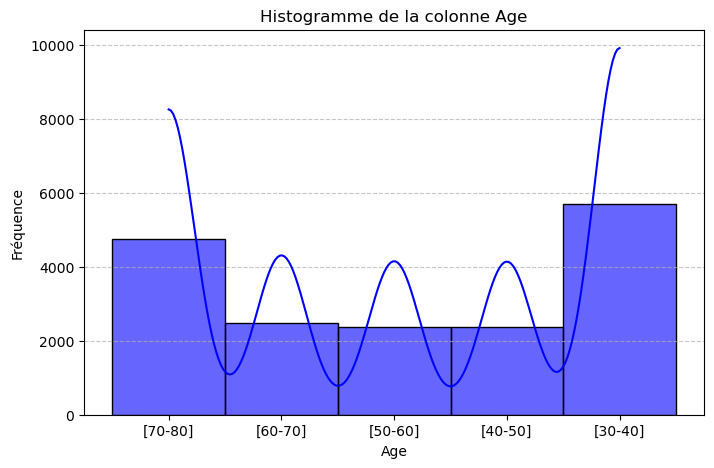

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(dt["Age_Group"], bins=20, kde=True, color="blue", edgecolor="black", alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Fréquence")
plt.title("Histogramme de la colonne Age")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### TumorSize

In [33]:
dt["TumorSize"].describe()

count    17686.000000
mean         5.499751
std          2.603107
min          1.000000
25%          3.300000
50%          5.500000
75%          7.700000
max         10.000000
Name: TumorSize, dtype: float64

In [34]:
dt["TumorSize"].value_counts().sort_index()

TumorSize
1.0      96
1.1     206
1.2     195
1.3     197
1.4     197
       ... 
9.6     219
9.7     199
9.8     208
9.9     207
10.0    113
Name: count, Length: 91, dtype: int64

##### missing values and outliers 

missing values 

In [41]:
if dt["TumorSize"].isna().sum() == 0:
    print("No missing values found.")
else:
    missing_count = dt["TumorSize"].isna().sum()
    print(f"The number of missing values is: {missing_count}")


SyntaxError: f-string: unmatched '[' (3470745216.py, line 4)